### Molecular descriptors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import seaborn as sns
from collections import OrderedDict
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
#from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
molecule = pd.read_csv("Molecule-descriptor.csv")

In [3]:
molecule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            6094 non-null   int64  
 1   HBA1                           6094 non-null   int64  
 2   HBA2                           6094 non-null   int64  
 3   HBD                            6094 non-null   int64  
 4   logP                           6094 non-null   float64
 5   MR                             6094 non-null   float64
 6   MW                             6094 non-null   float64
 7   sbonds                         6094 non-null   int64  
 8   TPSA                           6094 non-null   float64
 9   Fraction_of_rotatable_bonds    6093 non-null   float64
 10  Number_of_heavy_bonds          6093 non-null   float64
 11  MolarRefractivity              6093 non-null   float64
 12  Number_of_atoms                6093 non-null   f

In [4]:
molecule.head()

,cid,HBA1,HBA2,HBD,logP,MR,MW,sbonds,TPSA,Fraction_of_rotatable_bonds,Number_of_heavy_bonds,MolarRefractivity,Number_of_atoms,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1,13,0,1,0.3028,82.7547,268.74082,14,19.67,0.0000,21.0,96.4,32.0,11.9,1.009396,10.800000,14.0,5.413111,169.0,192.0
1,2,32,8,2,3.9990,110.7488,396.43966,37,114.74,0.2580,31.0,136.0,53.0,10.9,1.000764,9.892926,23.7,11.600000,266.0,260.0
2,4,30,6,2,4.5442,107.5378,364.44086,35,96.28,0.2410,29.0,133.0,51.0,12.5,1.006257,11.500000,21.7,10.700000,258.0,260.0
3,5,13,4,2,2.8712,71.9660,254.23750,13,70.67,0.0476,21.0,83.2,29.0,11.4,0.968000,10.800000,14.0,5.780000,148.0,171.0
4,6,15,6,4,2.2824,76.0120,286.23630,15,111.13,0.0435,23.0,87.9,31.0,12.0,0.968000,11.400000,15.9,6.245675,156.0,183.0


In [5]:
molecule.isnull().sum()

cid                              0
HBA1                             0
HBA2                             0
HBD                              0
logP                             0
MR                               0
MW                               0
sbonds                           0
TPSA                             0
Fraction_of_rotatable_bonds      1
Number_of_heavy_bonds            1
MolarRefractivity                1
Number_of_atoms                  1
Geometrical_diameter             1
Geometrical_radius               1
Geometrical_shape_coefficient    2
Kier_shape_1                     1
Kier_shape_2                     1
Zagreb_group_index_1             1
Zagreb_group_index_2             1
dtype: int64

In [6]:
molecule.shape

(6094, 20)

In [7]:
molecule = molecule.dropna()

In [8]:
molecule.isnull().sum()

cid                              0
HBA1                             0
HBA2                             0
HBD                              0
logP                             0
MR                               0
MW                               0
sbonds                           0
TPSA                             0
Fraction_of_rotatable_bonds      0
Number_of_heavy_bonds            0
MolarRefractivity                0
Number_of_atoms                  0
Geometrical_diameter             0
Geometrical_radius               0
Geometrical_shape_coefficient    0
Kier_shape_1                     0
Kier_shape_2                     0
Zagreb_group_index_1             0
Zagreb_group_index_2             0
dtype: int64

In [9]:
molecule.shape

(6092, 20)

In [10]:
molecule.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,6092.0,4793.440578,3412.317845,1.000000,1806.750000,4087.500000,7382.250000,11495.000000
HBA1,6092.0,26.508700,11.830720,4.000000,19.000000,24.000000,31.000000,110.000000
HBA2,6092.0,5.973900,2.429125,0.000000,4.000000,6.000000,7.000000,20.000000
HBD,6092.0,1.794813,1.386043,0.000000,1.000000,2.000000,2.000000,11.000000
logP,6092.0,4.094640,1.721464,-3.200600,2.956400,3.946000,5.066525,12.460000
MR,6092.0,107.793045,32.992559,16.407200,84.865700,100.612600,124.832500,315.580100
MW,6092.0,389.631175,115.683520,89.050120,311.762343,366.250760,448.520012,1110.429540
sbonds,6092.0,33.617367,16.952041,3.000000,23.000000,30.000000,40.000000,156.000000
TPSA,6092.0,92.249000,40.905329,0.000000,64.340000,86.635000,113.960000,318.310000
Fraction_of_rotatable_bonds,6092.0,0.208203,0.099846,0.000000,0.143000,0.194000,0.258000,0.824000


In [11]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(molecule['cid'])
true_labels[:]

array([   0,    1,    2, ..., 6089, 6090, 6091], dtype=int64)

In [12]:
label_encoder.classes_

array([    1,     2,     4, ..., 11493, 11494, 11495], dtype=int64)

In [13]:
n_clusters = len(label_encoder.classes_)

In [14]:
# Putting molecule into an array, and storing it in X

X = molecule.values[:, 0:20]

In [15]:
X[:, 0:20]

array([[1.00000000e+00, 1.30000000e+01, 0.00000000e+00, ...,
        5.41311134e+00, 1.69000000e+02, 1.92000000e+02],
       [2.00000000e+00, 3.20000000e+01, 8.00000000e+00, ...,
        1.16000000e+01, 2.66000000e+02, 2.60000000e+02],
       [4.00000000e+00, 3.00000000e+01, 6.00000000e+00, ...,
        1.07000000e+01, 2.58000000e+02, 2.60000000e+02],
       ...,
       [1.14930000e+04, 1.90000000e+01, 5.00000000e+00, ...,
        7.69526627e+00, 1.71000000e+02, 1.79000000e+02],
       [1.14940000e+04, 1.60000000e+01, 5.00000000e+00, ...,
        4.83555556e+00, 1.68000000e+02, 1.94000000e+02],
       [1.14950000e+04, 2.80000000e+01, 6.00000000e+00, ...,
        6.85714286e+00, 2.52000000e+02, 2.79000000e+02]])

In [16]:
# Standardization/Normalization using standard scaler

scaler = StandardScaler()
stdmolecule = scaler.fit_transform(X)

In [17]:
kmeans = KMeans(
    init ='k-means++',
    n_clusters = 4,
    n_init = 50,
    max_iter = 300,
    random_state =42
)

In [18]:
kmeans.fit(stdmolecule)

KMeans(n_clusters=4, n_init=50, random_state=42)

In [19]:
stdmolecule[:5, :3]
true_labels[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [20]:
kmeans.labels_[:]

array([1, 2, 2, ..., 1, 1, 1])

In [21]:
y_kmeans = kmeans.fit_predict(stdmolecule)

In [22]:
centroids = kmeans.cluster_centers_

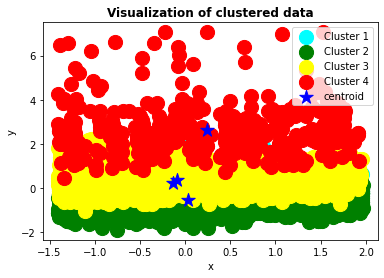

In [23]:
plt.scatter(stdmolecule[y_kmeans == 0, 0], stdmolecule[y_kmeans == 0, 1], s = 200, c = 'cyan', label = 'Cluster 1') 
plt.scatter(stdmolecule[y_kmeans == 1, 0], stdmolecule[y_kmeans == 1, 1], s = 200, c = 'green', label = 'Cluster 2') 
plt.scatter(stdmolecule[y_kmeans == 2, 0], stdmolecule[y_kmeans == 2, 1], s = 200, c = 'yellow', label = 'Cluster 3')
plt.scatter(stdmolecule[y_kmeans == 3, 0], stdmolecule[y_kmeans == 3, 1], s = 200, c = 'red', label = 'Cluster 4')
#plt.scatter(stdmolecule[y_kmeans == 4, 0], stdmolecule[y_kmeans == 4, 1], s = 200, c = 'orange', label = 'Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

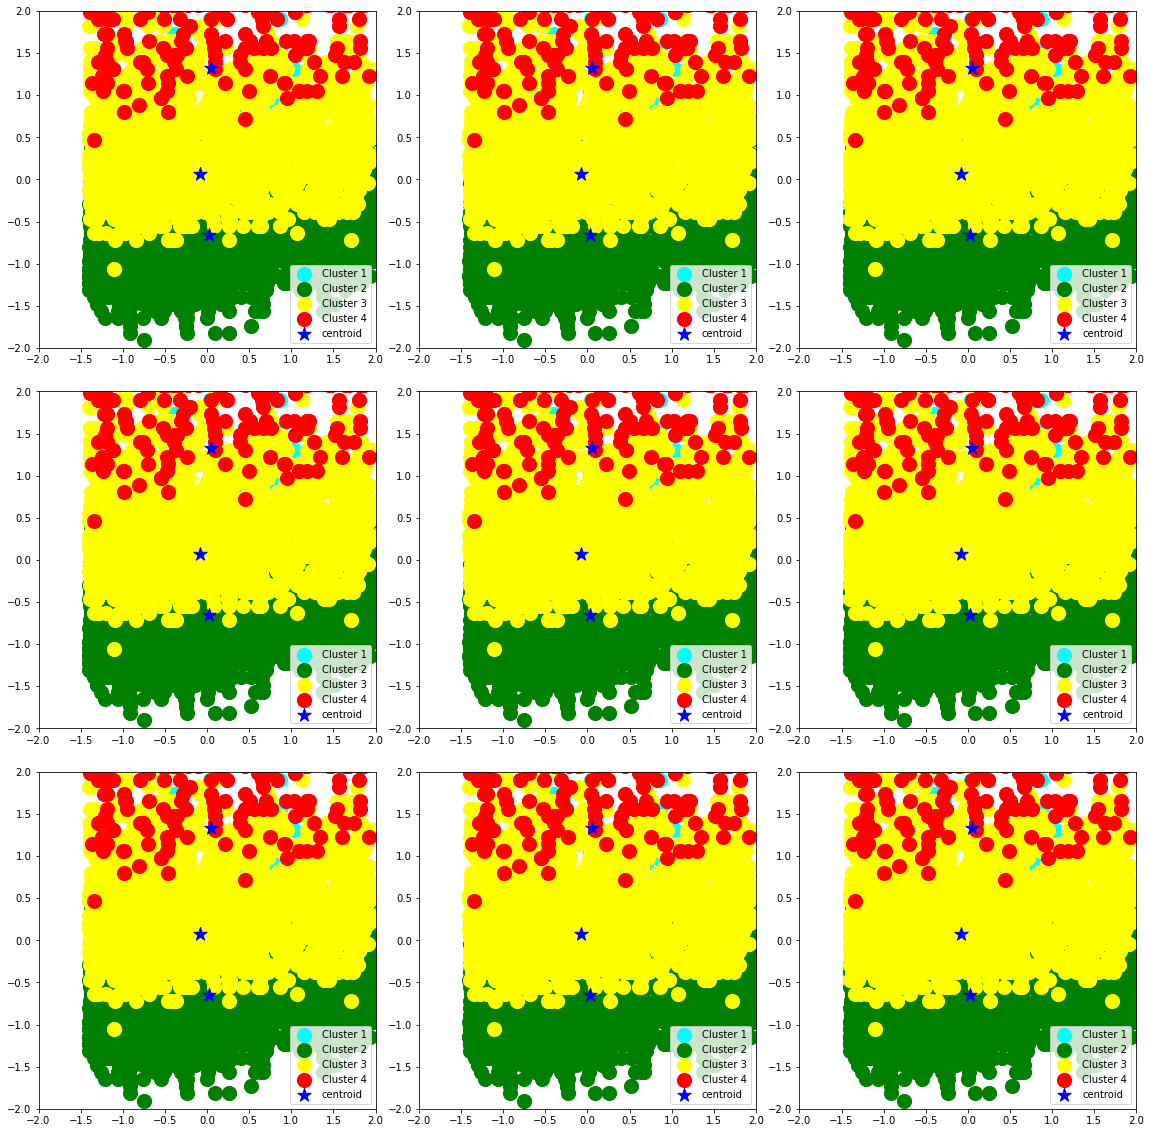

In [26]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    kmeans = KMeans(n_clusters=4,
                   max_iter=300,
                   init ='k-means++', 
                   random_state=42)
    kmeans.fit(stdmolecule)
    centroids = kmeans.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(stdmolecule[y_kmeans == 0, 0], stdmolecule[y_kmeans == 0, 1], s = 200, c = 'cyan', label = 'Cluster 1') 
    ax[i].scatter(stdmolecule[y_kmeans == 1, 0], stdmolecule[y_kmeans == 1, 1], s = 200, c = 'green', label = 'Cluster 2') 
    ax[i].scatter(stdmolecule[y_kmeans == 2, 0], stdmolecule[y_kmeans == 2, 1], s = 200, c = 'yellow', label = 'Cluster 3')
    ax[i].scatter(stdmolecule[y_kmeans == 3, 0], stdmolecule[y_kmeans == 3, 1], s = 200, c = 'red', label = 'Cluster 4')
    #ax[i].scatter(stdmolecule[y_kmeans == 4, 0], stdmolecule[y_kmeans == 4, 1], s = 200, c = 'orange', label = 'Cluster 5')

    #plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroids')
    ax[i].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    #ax[i].set_title(f'{kmeans.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();


In [27]:
stdmolecule_index = stdmolecule

In [28]:
molecule_index = molecule.index[:]

In [29]:
cluster_map = pd.DataFrame()
cluster_map['molecule_index'] = molecule.index.values
cluster_map['cluster'] = kmeans.labels_

cluster_map[cluster_map.cluster == 0]

,molecule_index,cluster
1,1,0
2,2,0
5,5,0
8,8,0
16,16,0
...,...,...
6049,6051,0
6050,6052,0
6059,6061,0
6084,6086,0


In [30]:
cluster_map[cluster_map.cluster == 1]

,molecule_index,cluster
9,9,1
52,52,1
85,85,1
179,179,1
181,181,1
...,...,...
5699,5701,1
5702,5704,1
5714,5716,1
5946,5948,1


In [31]:
cluster_map[cluster_map.cluster == 2]

,molecule_index,cluster
0,0,2
3,3,2
4,4,2
7,7,2
15,15,2
...,...,...
6086,6088,2
6087,6089,2
6089,6091,2
6090,6092,2


In [32]:
pd.set_option('display.max_rows',854)

cluster_map[cluster_map.cluster == 3]

,molecule_index,cluster
6,6,3
10,10,3
11,11,3
12,12,3
13,13,3
14,14,3
48,48,3
49,49,3
50,50,3
51,51,3


In [33]:
cluster_map[cluster_map.cluster == 4]

,molecule_index,cluster


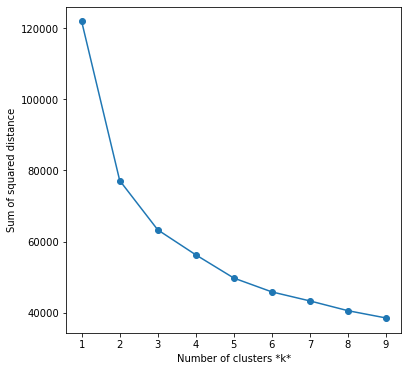

In [34]:
sse = []
list_k = list(range(1,10))

for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stdmolecule)
    sse.append(kmeans.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [35]:
# Silhouette coefficient is a measure of cluster cohesion and separation

silhouette_coefficient = []
for k in range(2,11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(stdmolecule)
        score = silhouette_score(stdmolecule, kmeans.labels_)
        silhouette_coefficient.append(score)

In [36]:
kmeans_silhouette = silhouette_score(
    stdmolecule, kmeans.labels_
).round(2)


In [37]:
kmeans_silhouette

0.17

### Kmeans clustering with principal component analysis (PCA)

In [38]:
pca = PCA()
pca.fit(stdmolecule)

PCA()

In [39]:
pca.explained_variance_ratio_

array([6.07226579e-01, 1.02307068e-01, 8.44775653e-02, 5.23828923e-02,
       4.71620253e-02, 2.75565367e-02, 2.70695903e-02, 2.02660412e-02,
       1.43052234e-02, 6.64207214e-03, 3.53685306e-03, 2.49583733e-03,
       2.04462742e-03, 1.33634905e-03, 5.52883503e-04, 3.38799182e-04,
       1.32824250e-04, 1.14417819e-04, 3.99850829e-05, 1.18294893e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

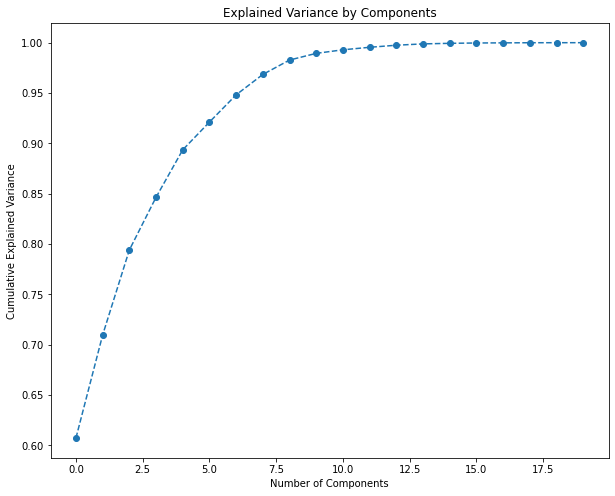

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(0,20), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

###A rule of thumb is to preserve around 85 % of the variance. So, in this instance, we decide to keep 3 components.

In [41]:
pca = PCA(n_components = 3)

In [42]:
pca.fit(stdmolecule)

PCA(n_components=3)

In [43]:
pca.transform(stdmolecule)

array([[-4.43513694, -1.48293039, -0.32117111],
       [ 0.72222868,  0.86531134, -0.07618483],
       [ 0.20928447,  0.0097753 , -0.14245065],
       ...,
       [-3.12409778,  0.569676  , -0.18391988],
       [-3.97437143,  0.39437525, -0.19424469],
       [-1.51188799,  0.36279562, -0.44275427]])

In [44]:
scores_pca = pca.transform(stdmolecule)

In [45]:
wcss = []
for k in range(0,20):
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', n_init = 9, max_iter = 300, random_state=42)

kmeans_pca.fit(scores_pca)
wcss.append(kmeans_pca.inertia_)

In [46]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=50, max_iter=500, random_state=42)

In [47]:
kmeans_pca.fit(scores_pca)

KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

In [48]:
pred = kmeans_pca.predict(scores_pca)

In [49]:
pca_centroid = kmeans_pca.cluster_centers_

In [50]:
molecule_pca_kmeans = pd.concat([molecule.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
molecule_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
molecule_pca_kmeans['Molecule k-means PCA'] = kmeans_pca.labels_

In [51]:
molecule_pca_kmeans.head()

,cid,HBA1,HBA2,HBD,logP,MR,MW,sbonds,TPSA,Fraction_of_rotatable_bonds,...,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2,Component 1,Component 2,Component 3,Molecule k-means PCA
0,1,13,0,1,0.3028,82.7547,268.74082,14,19.67,0.0000,...,1.009396,10.800000,14.0,5.413111,169.0,192.0,-4.435137,-1.482930,-0.321171,1
1,2,32,8,2,3.9990,110.7488,396.43966,37,114.74,0.2580,...,1.000764,9.892926,23.7,11.600000,266.0,260.0,0.722229,0.865311,-0.076185,3
2,4,30,6,2,4.5442,107.5378,364.44086,35,96.28,0.2410,...,1.006257,11.500000,21.7,10.700000,258.0,260.0,0.209284,0.009775,-0.142451,3
3,5,13,4,2,2.8712,71.9660,254.23750,13,70.67,0.0476,...,0.968000,10.800000,14.0,5.780000,148.0,171.0,-3.951928,-0.150091,0.262726,1
4,6,15,6,4,2.2824,76.0120,286.23630,15,111.13,0.0435,...,0.968000,11.400000,15.9,6.245675,156.0,183.0,-3.036327,1.373504,0.789185,1


In [52]:
molecule_pca_kmeans['Cluster'] = molecule_pca_kmeans['Molecule k-means PCA'].map({0:'first cluster',
                                                                                1:'second cluster',
                                                                                2:'third cluster',
                                                                                3:'fourth cluster'})

C:\Users\Thecla PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


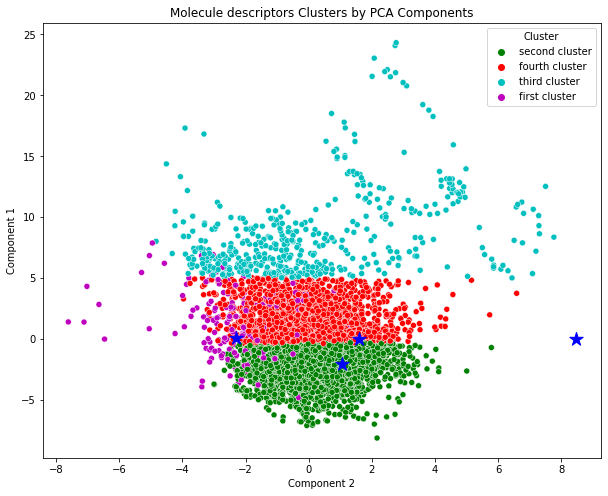

In [54]:
x_axis = molecule_pca_kmeans['Component 2']
y_axis = molecule_pca_kmeans['Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = molecule_pca_kmeans['Cluster'], palette = ['g', 'r', 'c','m'])

plt.scatter(pca_centroid[:, 0], pca_centroid[:, 1], marker='*', s=200, c='b', label='centroid')

plt.title('Molecule descriptors Clusters by PCA Components')
plt.show()

In [55]:
kmeans.inertia_

36773.83036519272

In [56]:
molecule_pca_kmeans['cluster'] = pred
molecule_pca_kmeans['cluster'].value_counts()

1    3309
3    2087
2     481
0     215
Name: cluster, dtype: int64

In [57]:
molecule_pca_kmeans_index = molecule_pca_kmeans

In [58]:
molecule_index = molecule.index[:]

In [59]:
molecule_pca_kmeans_index = molecule_pca_kmeans.index[:]

In [60]:
molecule_pca_kmeans_map = pd.DataFrame()
molecule_pca_kmeans_map['molecule_pca_kmeans_index'] = molecule_pca_kmeans.index.values
molecule_pca_kmeans_map['cluster'] = kmeans.labels_

molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 0]

,molecule_pca_kmeans_index,cluster
8,8,0
30,30,0
35,35,0
39,39,0
62,62,0
...,...,...
5960,5960,0
5961,5961,0
5981,5981,0
6002,6002,0


In [61]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 1]

,molecule_pca_kmeans_index,cluster
0,0,1
3,3,1
4,4,1
7,7,1
15,15,1
...,...,...
5999,5999,1
6000,6000,1
6001,6001,1
6031,6031,1


In [62]:
molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 2]

,molecule_pca_kmeans_index,cluster
1,1,2
24,24,2
40,40,2
68,68,2
69,69,2
...,...,...
5648,5648,2
5665,5665,2
5867,5867,2
5881,5881,2


In [63]:
pd.set_option('display.max_rows',894)

molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 3]

,molecule_pca_kmeans_index,cluster
85,85,3
181,181,3
182,182,3
187,187,3
343,343,3
430,430,3
489,489,3
548,548,3
688,688,3
1076,1076,3


In [64]:
# dimensionality reduction using Principal component Analysis (PCA)

preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3, random_state=42)),
    ]
)

In [65]:
# kmeans clustering pipeline

clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=4,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

In [66]:
# build an end to end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelins to Piprline

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [67]:
pipe.fit(stdmolecule)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [68]:
preprocessed_stdmolecule = pipe["preprocessor"].transform(stdmolecule)

In [69]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [70]:
silhouette_score(preprocessed_stdmolecule, predicted_labels)

0.3184812576546168

In [71]:
adjusted_rand_score(true_labels, predicted_labels)

0.0

In [72]:
accuracy_score(true_labels, predicted_labels)

0.0

In [73]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(stdmolecule),
    columns=["component_1", "component_2", "component_3"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [74]:
pcadf.head

<bound method NDFrame.head of       component_1  component_2  component_3  predicted_cluster  true_label
0       -0.548310    -0.377361    -0.162613                  2           1
1        0.052536    -0.413457     0.136500                  0           2
2       -0.009013    -0.414822     0.036474                  0           4
3       -0.475666    -0.380270     0.030283                  2           5
4       -0.357378    -0.382035     0.229228                  2           6
...           ...          ...          ...                ...         ...
6087    -0.149688     0.602583     0.112528                  1       11491
6088    -0.004050     0.587296    -0.081037                  1       11492
6089    -0.306414     0.615315     0.002726                  1       11493
6090    -0.402339     0.622050    -0.012630                  1       11494
6091    -0.127082     0.604365    -0.033721                  1       11495

[6092 rows x 5 columns]>

In [ ]:
centroids = kmeans.cluster_centers_

C:\Users\Thecla PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


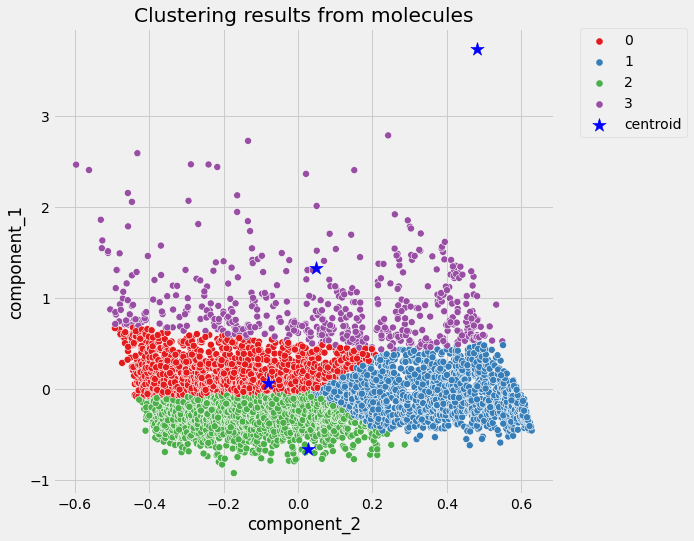

In [75]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

x_axis = pcadf["component_2"]
y_axis = pcadf["component_1"]

scat = sns.scatterplot(
    x_axis, 
    y_axis,
    s=50,
    hue=pcadf["predicted_cluster"],
    palette="Set1",
)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

scat.set_title(
    "Clustering results from molecules"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()